References
----------
[1] https://openstax.org/books/calculus-volume-1/pages/3-6-the-chain-rule
    
[2] Checkpoint 3.35
$$
\begin{equation}
f(x)=(x^2-2)^3
\end{equation}
$$

SymPy version: 1.13.2
NumPy version: 1.26.4
Matplotlib version: 3.9.2

Lambda(x, (x**2 - 2)**3)
x:[-5.         -4.33333333 -3.66666667 -3.         -2.33333333 -1.66666667
 -1.         -0.33333333  0.33333333  1.          1.66666667  2.33333333
  3.          3.66666667  4.33333333  5.          5.66666667  6.33333333
  7.          7.66666667  8.33333333  9.          9.66666667 10.33333333
 11.        ]
y:[12167.0000000000, 4722.84087791495, 1498.93964334705, 343.000000000000, 40.8655692729767, 0.470507544581620, -1.00000000000000, -6.73936899862825, -6.73936899862826, -1.00000000000000, 0.470507544581615, 40.8655692729766, 343.000000000000, 1498.93964334705, 4722.84087791494, 12167.0000000000, 27301.1124828532, 55354.7421124828, 103823.000000000, 183035.433470507, 306788.124828532, 493039.000000000, 764666.347050754, 1150290.54458162, 1685159.00000000]
f′(x)=6*x*(x**2 - 2)**2
f′(-2)=-48.0000000000000
y_tangent:[152.000000000000 120.000000000000 88.0000000000000 56.0000000000000
 24.00000

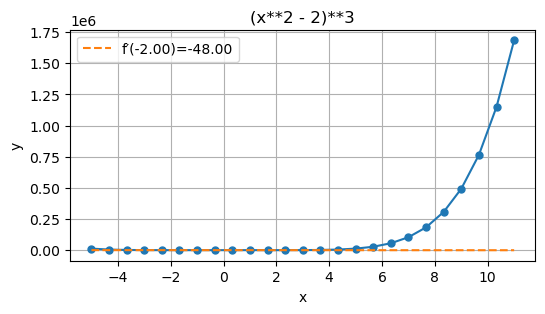

In [2]:
import sympy as sp
from sympy.abc import x, y
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

print(f"SymPy version: {sp.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print()

f = sp.Lambda(x, (x ** 2 - 2) ** 3)
print(f)

x_values = np.linspace(-5, 11, 25)
print(f"x:{x_values}")
y_values = list(map(f, x_values))
print(f"y:{y_values}")

f_prime = sp.diff(f(x), x)
print(f"f′(x)={f_prime}")

x_at = -2


def calculate_slope(derivative_fn, derivative_order=1):
    slope = derivative_fn.subs(x, x_at).evalf()
    apostrophe = "′" * derivative_order
    print(f"f{apostrophe}({x_at})={slope}")
    y_tangent = slope * (x_values - x_at) + f(x_at).evalf()
    print(f"y_tangent:{y_tangent}")
    return slope, y_tangent


slope, y_tangent = calculate_slope(f_prime)

y0 = f(x_at)
point_slope_form_equation = sp.Eq(y - y0, slope * (x - x_at))
print(point_slope_form_equation)
slope_intercept_form = sp.solve(point_slope_form_equation, y)
print(slope_intercept_form)

figure, axes = plt.subplots(figsize=(6, 3))
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_title(f.expr)
axes.grid()
axes.plot(x_values, y_values, marker="o", markersize=5)
axes.plot(x_values, y_tangent, label=f"f′({x_at:.2f})={slope:.2f}", linestyle="--")
axes.legend()
plt.show()